# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [29]:
import logging

import numpy as np
import pandas as pd

import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

# Configure Logger

In [30]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask408_Unit_test_plot_time_series_by_period'
  hash='2c4168ed6'
  # Last commits:
    * 2c4168ed6 hhxjqm   Update plot                                                       (25 minutes ago) Mon Jul 17 19:21:49 2023  (HEAD -> SorrTask408_Unit_test_plot_time_series_by_period, origin/SorrTask408_Unit_test_plot_time_series_by_period)
    *   af82c16c2 hhxjqm   Merge branch 'master' into SorrTask408_Unit_test_plot_time_series_by_period (   2 hours ago) Mon Jul 17 17:24:41 2023           
    |\  
    * | 4e8a47a3d hhxjqm   Update comment                                          

# Plots

## `plot_histograms_and_lagged_scatterplot()`

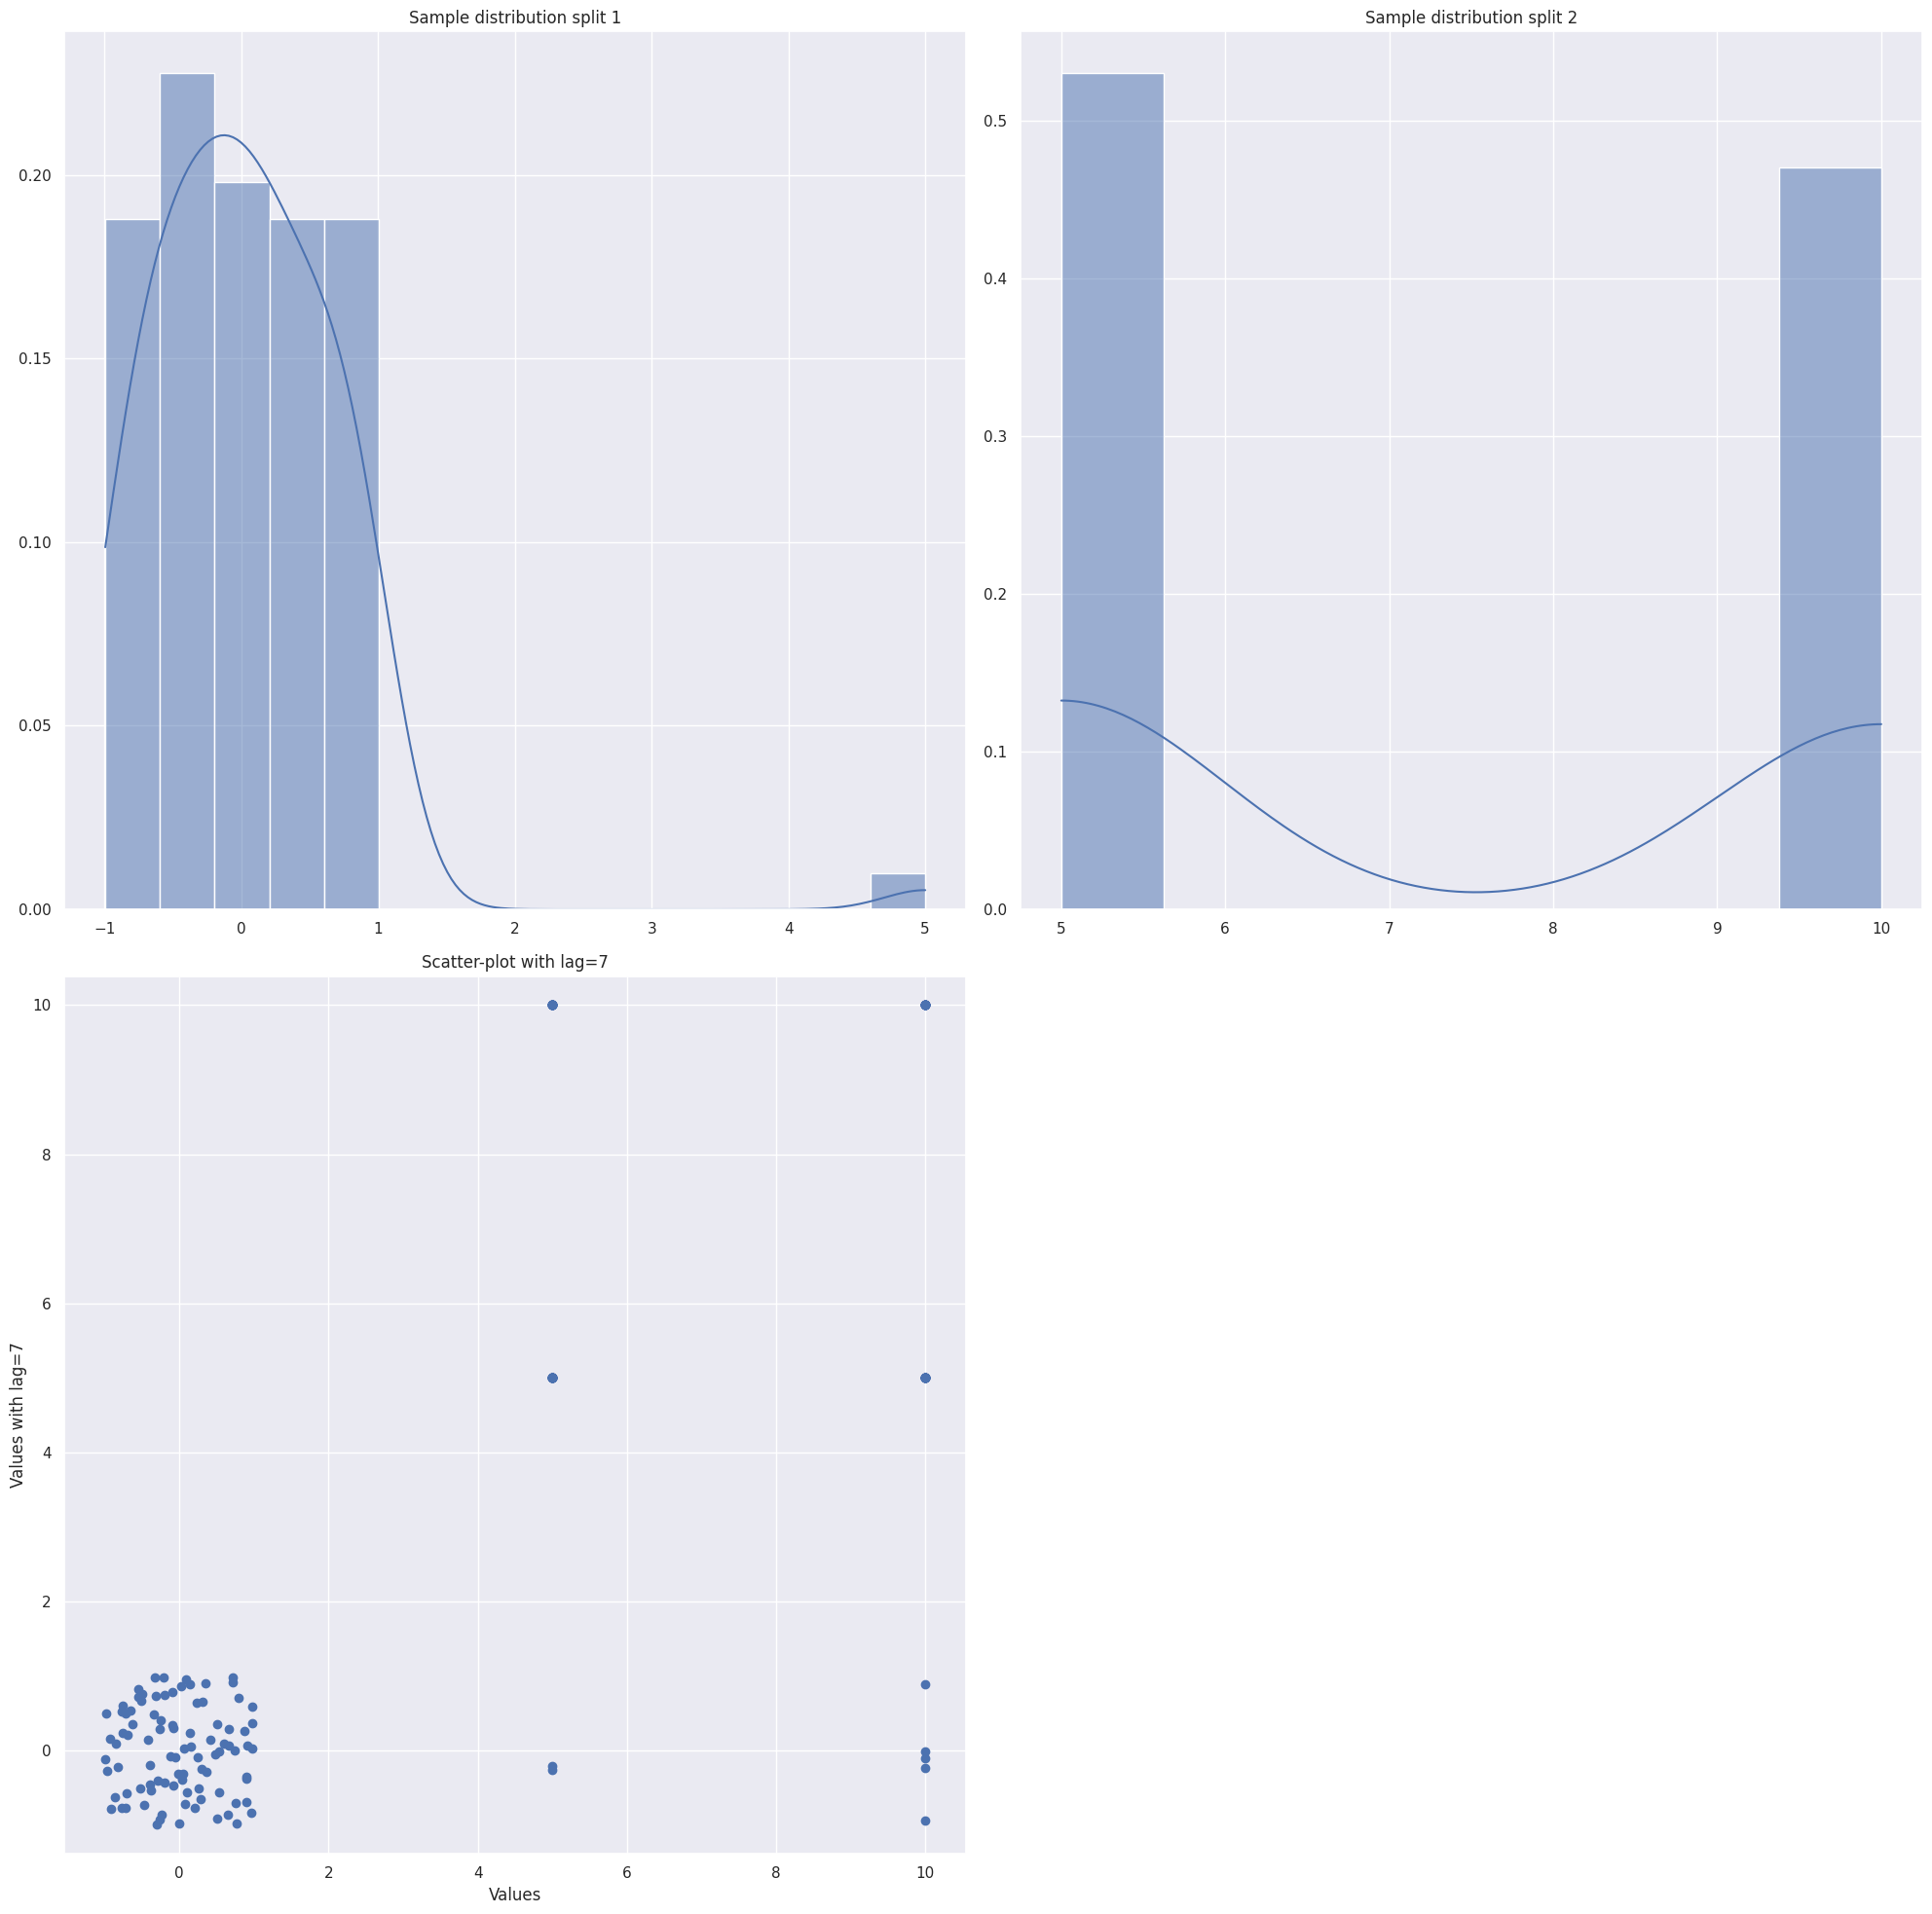

In [31]:
# Set inputs.
seq = np.concatenate(
    [np.random.uniform(-1, 1, 100), np.random.choice([5, 10], 100)]
)
index = pd.date_range(start="2023-01-01", periods=len(seq), freq="D")
srs = pd.Series(seq, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`
figsize = (20, 20)
# Plot.
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_time_series_by_period()`

In [32]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

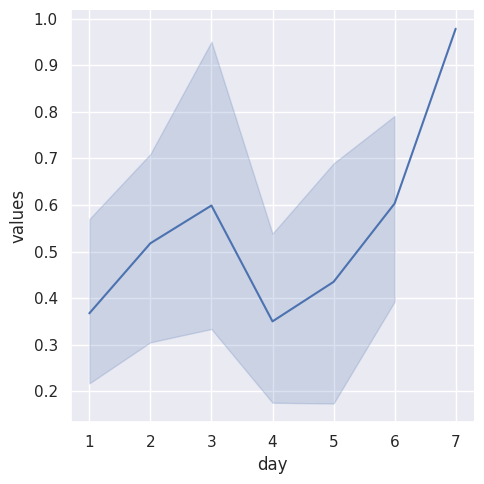

In [33]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

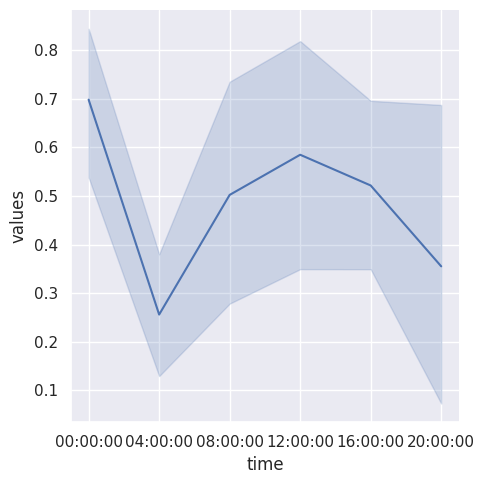

In [34]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)